## Cahier des charges

# Configuration d'une Infrastructure Réseau


## Introduction


Vous venez d'intégrer une équipe dans le bureau d'étude d'une petite entreprise.
Votre première tâche consiste à installer et configurer l'infrastructure réseau de l'entreprise.

## Matériel Nécessaire


### Routeur : Cisco Series 800


Le routeur **Cisco Series 800** est conçu pour les petites entreprises et les réseaux distants.
Voici ses principales caractéristiques :
- **Interfaces WAN** : Connexion Ethernet ou xDSL.
- **Ports LAN** : Jusqu'à 4 ports Ethernet.
- **Sécurité intégrée** : Pare-feu, VPN (IPSec/SSL), et NAT.
- **Performances** : Optimisées pour le trafic voix, vidéo, et données.


Pour plus de détails sur la configuration  [documentation officielle de Cisco](https://www.cisco.com).

### Switch : Cisco Catalyst 2960


Le switch **Cisco Catalyst 2960** est un commutateur de niveau 2 conçu pour la gestion des réseaux d'entreprise.
Ses caractéristiques principales incluent :
- **Ports** : Jusqu'à 48 ports Ethernet (10/100 Mbps) selon le modèle.
- **Support PoE** : Alimentation des périphériques comme les téléphones IP.
- **Gestion VLAN** : Configuration de réseaux locaux virtuels.
- **Sécurité** : Port Security, ACLs et autres fonctions avancées.


Ce switch est idéal pour assurer une connectivité fiable et une gestion simplifiée des périphériques réseau.

### Câbles Utilisés


1. **RJ45** :
  - Utilisé pour connecter les ordinateurs, le routeur, et le switch.
  - Supporte les connexions Ethernet jusqu'à 1 Gbps selon les spécifications du câble (Cat5e, Cat6).


2. **Port Console** :
  - Câble série utilisé pour la configuration initiale des équipements réseau.
  - Nécessite un adaptateur USB-to-Serial pour les ordinateurs modernes.


Pour chaque équipement, connectez un câble RJ45 entre le routeur et le switch, et utilisez le câble console pour accéder au terminal de configuration.


# Diagramme de Gantt 

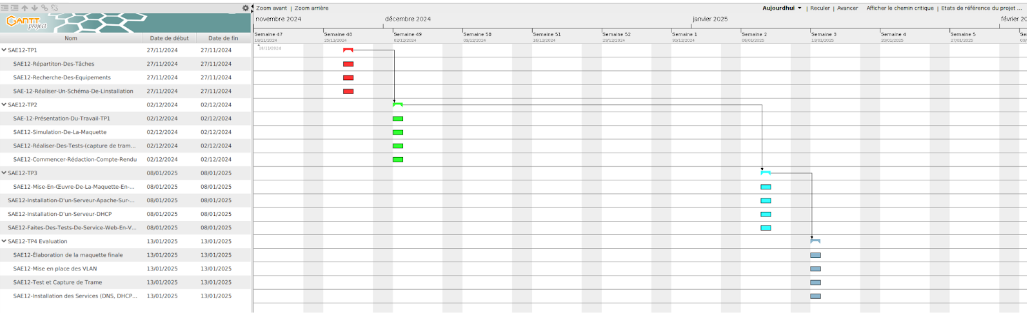

# Ci-dessous le schéma de la maquette:

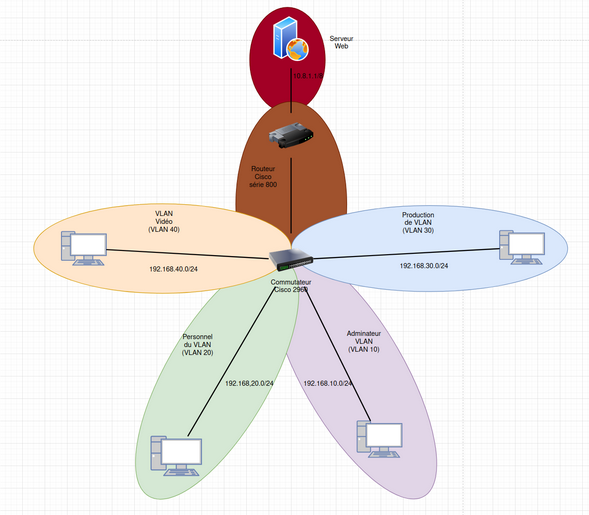

# Ci-dessous une capture d'écran de la maquette du projet:

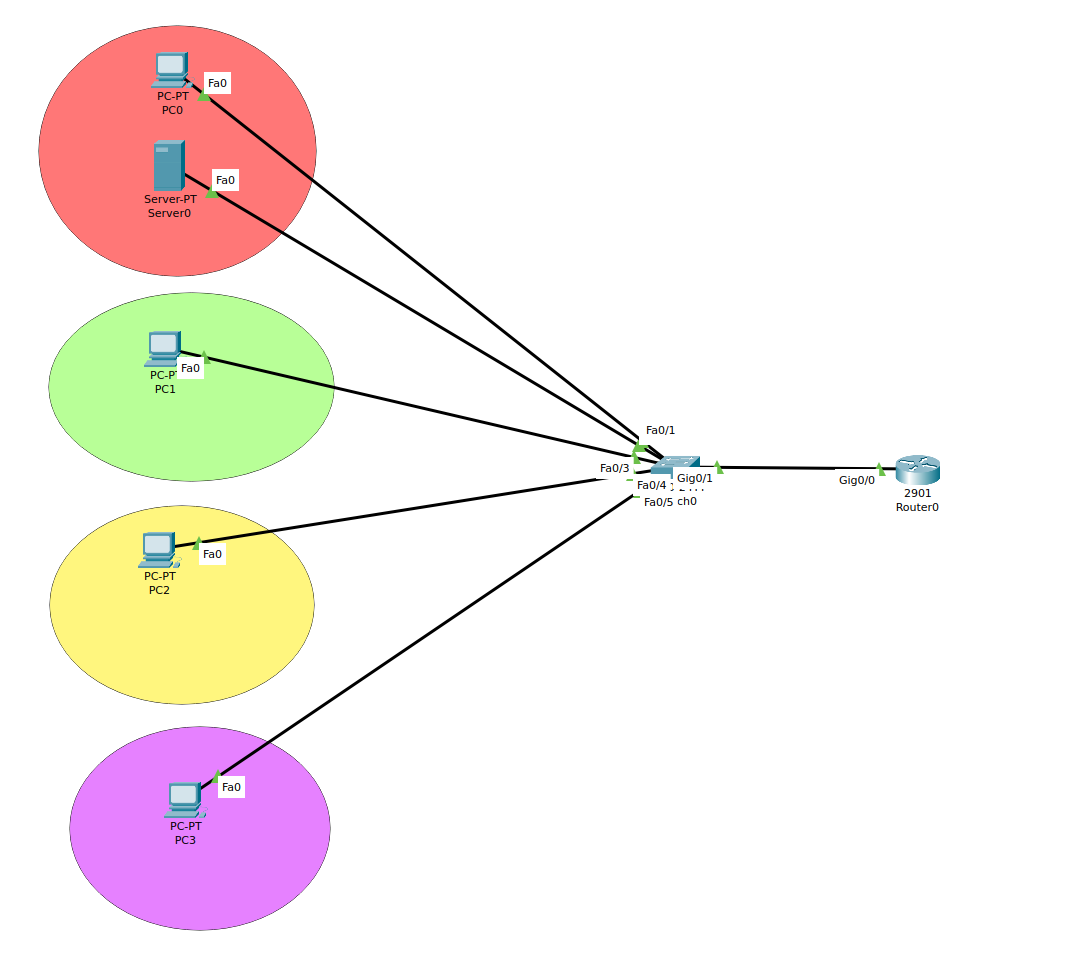

## Ligne de commande de configuration switch : 


>>enable 
>>configure terminal 
>>hostname S1

## Création des vlan : 

>>vlan 10 
>>name administrateur 
>>vlan 20
>>name personnel 
>>vlan 30
>>name production 
>>vlan 40 
>>exit 


>>configuration des ports : 
>>interface fa0/37
>>switchport mode trunk 
>>switchport acces allowed vlan 1-99
>>no sh 
>>exit

>>interface range fa0/1 -6 
>>switchport mode acces 
>>switchport acces vlan 10 
>>no sh 



>>interface range fa0/7 - 13
>>switchport mode acces 
>>switchport acces vlan 20
>>no sh 






>>interface range fa0/13 - 20
>>switchport mode acces 
>>switchport acces vlan 30
>>no sh 

>>interface range fa0/21 -  24
>>switchport mode acces 
>>switchport acces vlan 40
>>no sh 



## Ligne de commande de la configuration du routeur : 

>>conf t 
>>hostname R1 
>>no ip domain lookup 
>>vlan 10
>>vlan 20
>>vlan 30
>>vlan 40
>>int vlan 10
>>ip add 192.168.10.1 255.255.255.0
>>no sh
>>int vlan 20
>>ip add 192.168.20.1 255.255.255.0
>>no sh
>>int vlan 30
>>ip add 192.168.30.1 255.255.255.0
>>no sh
>>int vlan 40
>>ip add 192.168.40.1 255.255.255.0
>>no sh
>>exit














## Configuration du dns et du dhcp dans le routeur :

>>conf t 
>>int g0
>>switchport mode trunk 
>>switchport trunk allowed vlan 1-1005

>>ip dhcp pool vlan 10 
>>network 192.168.10.0 255.255.255.0
>>default-router 192.168.10.1
>>dns server 10.0.0.1
>>exit


>>ip dhcp pool vlan 20
>>network 192.168.20.0 255.255.255.0
>>default-router 192.168.20.1
>>dns server 10.0.0.1
>>exit


>>ip dhcp pool vlan 30
>>network 192.168.30.0 255.255.255.0
>>default-router 192.168.30.1
>>dns-server 10.0.0.1
>>exit

switchport mode trunk 
>>ip dhcp pool vlan 40
>>network 192.168.40.0 255.255.255.0
>>default-router 192.168.40.1
>>dns-server 10.0.0.1
>>exit


exclure adresse ip :
>>ip dhcp exclused-address 192.168.10.1
>>ip dhcp exclused-address 192.168.10.2
>>ip dhcp exclused-address 192.168.20.1
>>ip dhcp exclused-address 192.168.20.2
>>ip dhcp exclused-address 192.168.30.1
>>ip dhcp exclused-address 192.168.30.2
>>ip dhcp exclused-address 192.168.40.1
>>ip dhcp exclused-address 192.168.40.2



## Configurer le nat dans le vlan : 

>>int vlan 10 
>>ip nat inside 

>>int vlan 20
>>ip nat inside 

>>int vlan 30 
>>ip nat inside 

>>int vlan 40
>>ip nat inside 


>>int g4 
ip nat outside 


>>ip add 10.8.1.1 255.0.0.0

>>ip route 0.0.0.0 0.0.0.0 10.0.0.1

>> access-list permit 192.168.10.0  0.0.0.255
 >>access-list permit 192.168.20.0  0.0.0.255
 >>access-list permit 192.168.30.0  0.0.0.255
 >>access-list permit 192.168.40.0  0.0.0.255


>>ip nat inside source list 1 interface gigabitethernet 4 overlord 

>>ip nat inside source list 2 interface gigabitethernet 4 overlord 

>>ip nat inside source list 3 interface gigabitethernet 4 overlord 

>>ip nat inside source list 4 interface gigabitethernet 4 overlord 
 




# Etude de trame Wireshark  du vlan 20 vers vlan 10: 

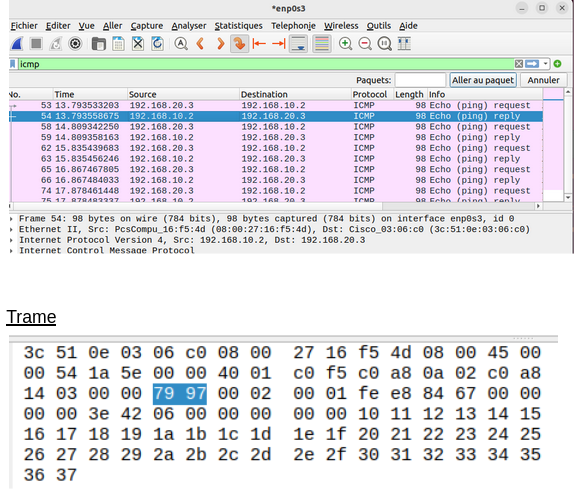

3c 51 0E 03 06 0 : adresse mac destination 

06 C9 08 27 16 F5 : adresse mac source 

0800: indique qu’il s’agit d’une adresse ipv4




45 : version et longueur en tête 
4 : indique ipv4
5: indique une longueur d’en-tête 


00 54: longueur totale de la trame Ipv4 est de 84 octet (0x54)

1a 5e : le fragment de ce datagramme 

40 01 : 
40: TTl est de 64 cela indique le nombre de sauts autorisés 
01: correspond à icmp

c5 c0 : vérifie l'intégrité de l’en-tête ipv4 

a0 c0 0a 02 : adresse ip source 

a8 c0 0a 08 : adresse ip destination 

08 00 : type et code 

08 : indique une requête 
00: indique un code nul

fe e8 : vérifie l'intégrité des données icmp 

4d 67 : identifie la requête ping 

00 00 : numéro de séquence de cette requête 


# Etude de trame Wireshark du vlan 10 vers vlan 40

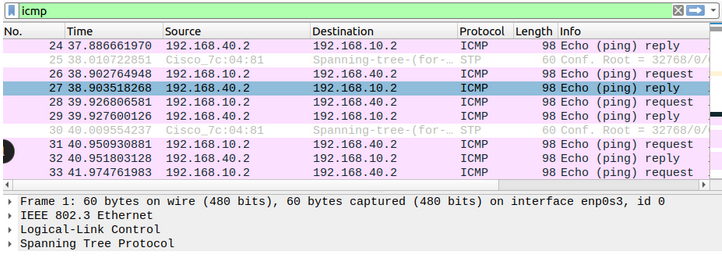

# Etude de trame Wireshark du vlan 10 vers vlan 30

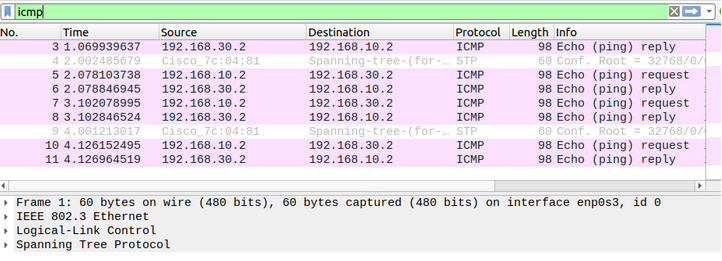

# Test du serveur dns 

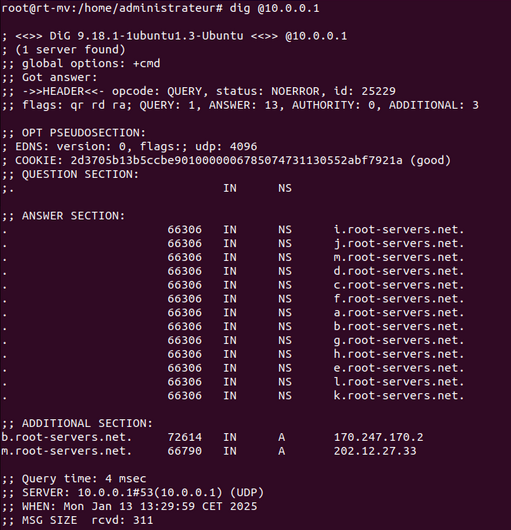

# Test du serveur Dhcp :

# Vlan 40:

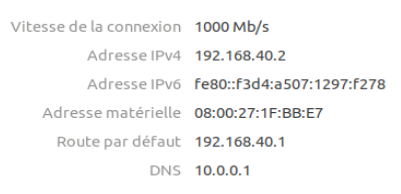

on voit donc que le serveur dhcp est bien fonctionnel car il a permit de définir les adresses ip automatiquement 

# Serveur Apache fonctionnel: 

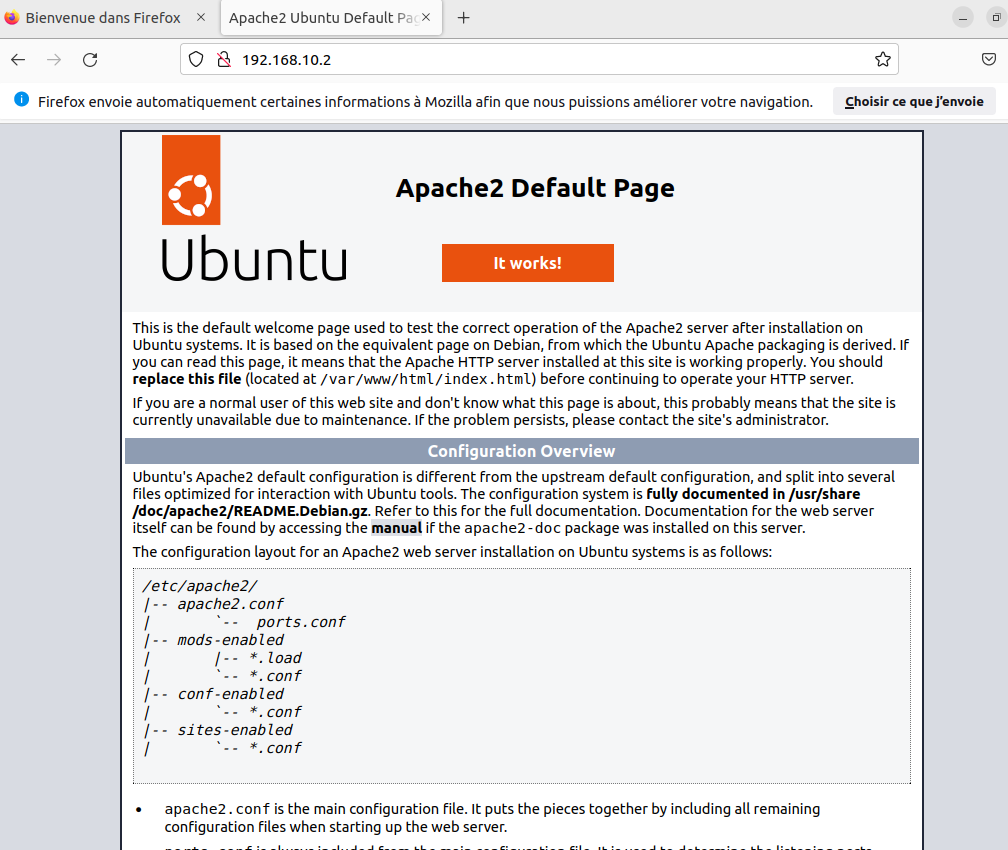

Les tests ont permis de vérifier que les services Apache, DNS et DHCP fonctionnent correctement sur leurs machines virtuelles respectives. Les trames capturées montrent les échanges de données entre les clients et les serveurs pour chaque service, prouvant ainsi leur bon fonctionnement.